<a href="https://colab.research.google.com/github/aadityane93/llm/blob/main/German_Corpus_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. NLTK Installation and Library Imports

In [ ]:
pip install nltk matplotlib wordcloud

In [ ]:
import nltk
import re
from nltk import *
from nltk.corpus import europarl_raw
from matplotlib import pyplot as plt
from nltk.stem.snowball import SnowballStemmer
!python -m spacy download de_core_news_sm
import spacy
from wordcloud import WordCloud
from nltk.corpus import stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 21.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 2/3. Language Corpora

In [ ]:
nltk.download('punkt_tab')
nltk.download('europarl_raw')
nltk.download('stopwords')
nlp = spacy.load("de_core_news_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package europarl_raw to /root/nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text = europarl_raw.german.raw()
# lower the text
text = text.lower()
# Remove line numbers / bullet points
text = re.sub(r'^\s*\d+\s*[\.\)]?\s*', '', text, flags=re.MULTILINE)
# Remove all non-letter characters
text = re.sub(r'[^a-zäöüß\s.,!?]', '', text)
# Remove the blanck spaces
text = re.sub(r'\s+', ' ', text)
text = text.strip()
print(text[:1000])

wiederaufnahme der sitzungsperiode ich erkläre die am freitag , dem . dezember unterbrochene sitzungsperiode des europäischen parlaments für wiederaufgenommen , wünsche ihnen nochmals alles gute zum jahreswechsel und hoffe , daß sie schöne ferien hatten . wie sie feststellen konnten , ist der gefürchtete milleniumbug nicht eingetreten . doch sind bürger einiger unserer mitgliedstaaten opfer von schrecklichen naturkatastrophen geworden . im parlament besteht der wunsch nach einer aussprache im verlauf dieser sitzungsperiode in den nächsten tagen . heute möchte ich sie bitten das ist auch der wunsch einiger kolleginnen und kollegen , allen opfern der stürme , insbesondere in den verschiedenen ländern der europäischen union , in einer schweigeminute zu gedenken . ich bitte sie , sich zu einer schweigeminute zu erheben . das parlament erhebt sich zu einer schweigeminute . frau präsidentin , zur geschäftsordnung . wie sie sicher aus der presse und dem fernsehen wissen , gab es in sri lanka 

# 4. Lexical Richness

In [ ]:
# Tokenize the words
words = word_tokenize(text)
#Uniqe words
unique_words = set(words)
lexical_richness = len(unique_words) / len(words)
print(f"Lexical Richness: {lexical_richness:.4f}")

Lexical Richness: 0.0529


# 5. Character Distribution

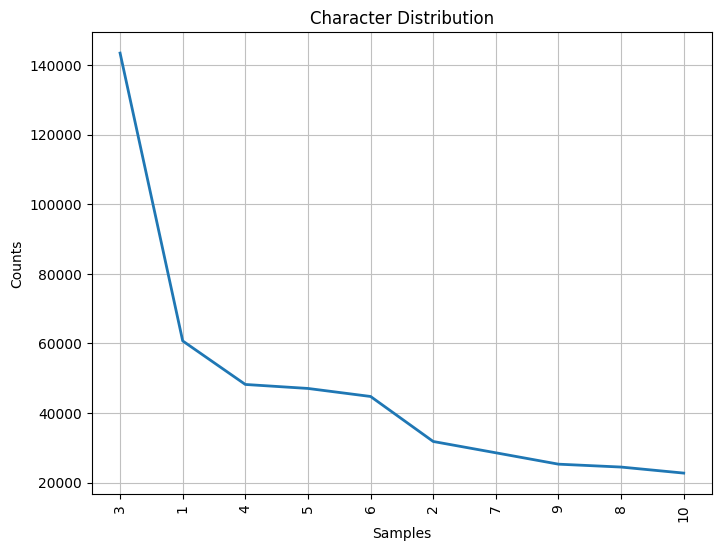

In [ ]:
lengths = [len(w) for w in words]
char_dist = FreqDist(lengths)
plt.figure(figsize=(8, 6))
char_dist.plot(10, title="Character Distribution")
plt.show()

#6. Word Distribution - 20 most often used words

Top 20 Most Common Words:
,: 37816
die: 21775
.: 20845
der: 19735
und: 14346
in: 8902
zu: 6572
den: 6251
daß: 5679
wir: 5497
das: 5412
ich: 5395
von: 5093
für: 4912
ist: 4884
es: 4230
nicht: 4229
des: 3975
eine: 3948
auf: 3920


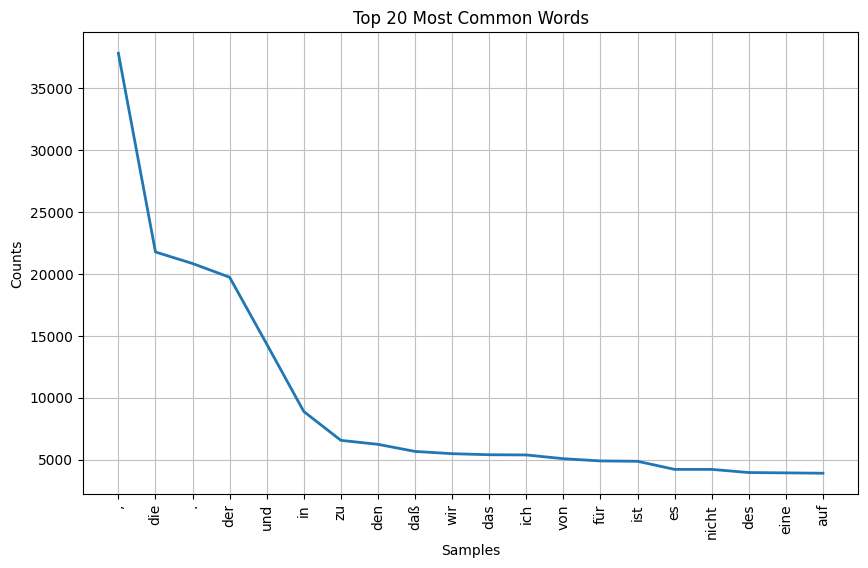

In [ ]:
word_freq = FreqDist(words)
top_20_words = word_freq.most_common(20)

print("Top 20 Most Common Words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")
plt.figure(figsize=(10, 6))
word_freq.plot(20, title="Top 20 Most Common Words")
plt.show()

#8. Splitting -Longest word

In [ ]:
longest_word = max(words, key=len)
print(f"Longest Word: {longest_word}")

# Simple greedy splitting algorithm
def split_word(word, min_length=3):
    parts = []
    while len(word) > min_length:
        part = word[:min_length]
        parts.append(part)
        word = word[min_length:]
    if word:
        parts.append(word)
    return parts

subwords = split_word(longest_word)
print(f"Subwords: {subwords}")

Longest Word: schiffsklassifizierungsgesellschaften
Subwords: ['sch', 'iff', 'skl', 'ass', 'ifi', 'zie', 'run', 'gsg', 'ese', 'lls', 'cha', 'fte', 'n']


#9. CFG Sentence with 5 words

In [ ]:
text[100:]

'speriode des europäischen parlaments für wiederaufgenommen , wünsche ihnen nochmals alles gute zum jahreswechsel und hoffe , daß sie schöne ferien hatten . wie sie feststellen konnten , ist der gefürchtete milleniumbug nicht eingetreten . doch sind bürger einiger unserer mitgliedstaaten opfer von schrecklichen naturkatastrophen geworden . im parlament besteht der wunsch nach einer aussprache im verlauf dieser sitzungsperiode in den nächsten tagen . heute möchte ich sie bitten das ist auch der wunsch einiger kolleginnen und kollegen , allen opfern der stürme , insbesondere in den verschiedenen ländern der europäischen union , in einer schweigeminute zu gedenken . ich bitte sie , sich zu einer schweigeminute zu erheben . das parlament erhebt sich zu einer schweigeminute . frau präsidentin , zur geschäftsordnung . wie sie sicher aus der presse und dem fernsehen wissen , gab es in sri lanka mehrere bombenexplosionen mit zahlreichen toten . zu den attentatsopfern , die es in jüngster zeit 

In [ ]:
sentence = " speriode des europäischen parlaments für wiederaufgenommen "
tokens = word_tokenize(sentence)

grammar = nltk.CFG.fromstring("""
    S -> NP
    NP -> N PP
    PP -> Prep NP
    NP -> Det Adj N
    N -> "Sitzungsperiode" | "Parlaments" | "Wiederaufgenommene"
    Adj -> "Europäischen"
    Det -> "des"
    Prep -> "für"
""")

print("Generated CFG:")
print(grammar)

Generated CFG:
Grammar with 10 productions (start state = S)
    S -> NP
    NP -> N PP
    PP -> Prep NP
    NP -> Det Adj N
    N -> 'Sitzungsperiode'
    N -> 'Parlaments'
    N -> 'Wiederaufgenommene'
    Adj -> 'Europäischen'
    Det -> 'des'
    Prep -> 'für'


#10. Stemmer

In [ ]:
stemmer = SnowballStemmer("german")
stemmed_sentence = [stemmer.stem(word) for word in tokens]
print(f"Stemmed Sentence: {stemmed_sentence}")

Stemmed Sentence: ['speriod', 'des', 'europa', 'parlament', 'fur', 'wiederaufgenomm']


#11. Lemmatizer

In [ ]:
doc = nlp(sentence)
lemmatized_sentence = [token.lemma_ for token in doc]
print(f"Lemmatized Sentence: {lemmatized_sentence}")

Lemmatized Sentence: [' ', 'Speriode', 'der', 'europäisch', 'Parlament', 'für', 'wiederaufnehmen']


#12. Removing the Stopwords and ploting distribution charts

Top 20 Most Common Words (Without Stopwords):
,: 37816
.: 20845
kommission: 2373
europäischen: 1804
herr: 1789
union: 1507
möchte: 1272
müssen: 1191
muß: 1190
parlament: 1152
präsident: 997
!: 878
europäische: 870
bericht: 844
frau: 818
mitgliedstaaten: 775
frage: 761
?: 738
wurde: 676
europa: 632


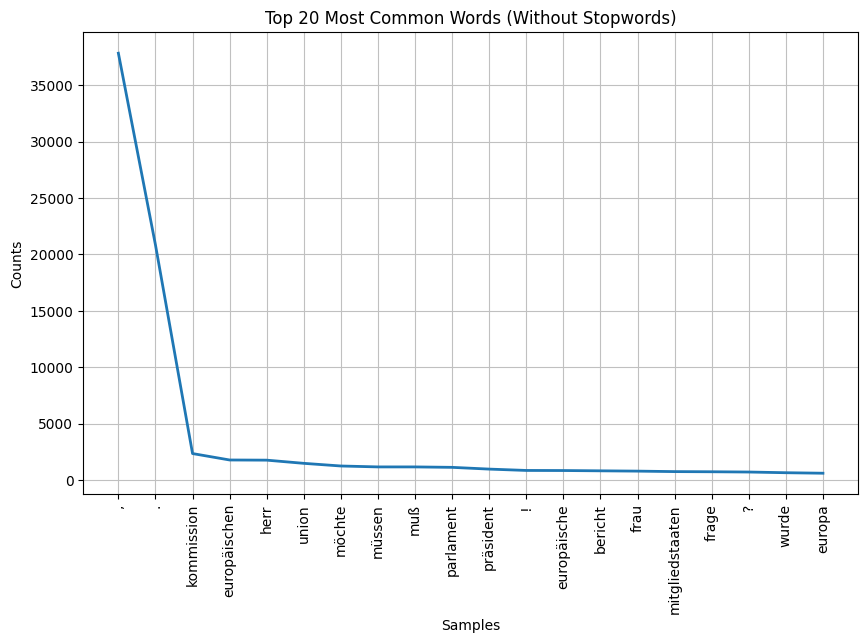

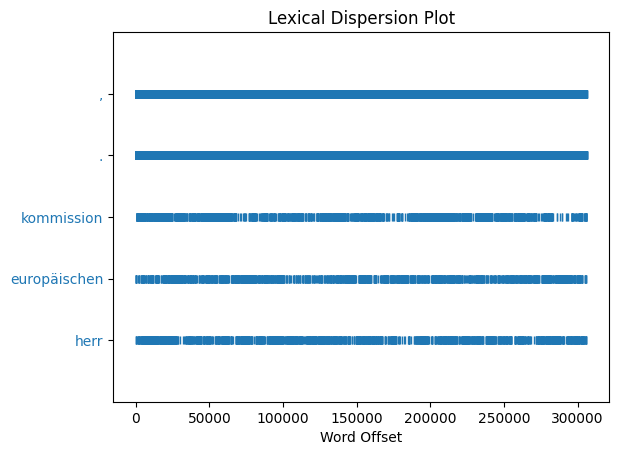

In [ ]:
stop_words = set(stopwords.words("german"))
filtered_words = [word for word in words if word not in stop_words]

filtered_word_freq = FreqDist(filtered_words)
top_20_filtered = filtered_word_freq.most_common(20)

print("Top 20 Most Common Words (Without Stopwords):")
for word, freq in top_20_filtered:
    print(f"{word}: {freq}")

#Word Distribution graph
plt.figure(figsize=(10, 6))
filtered_word_freq.plot(20, title="Top 20 Most Common Words (Without Stopwords)")
plt.show()

# Dispersion plot
filtered_text_obj = Text(filtered_words)
filtered_top_5 = [word for word, _ in filtered_word_freq.most_common(5)]
filtered_text_obj.dispersion_plot(filtered_top_5)
plt.show()

#13. Wordcloud

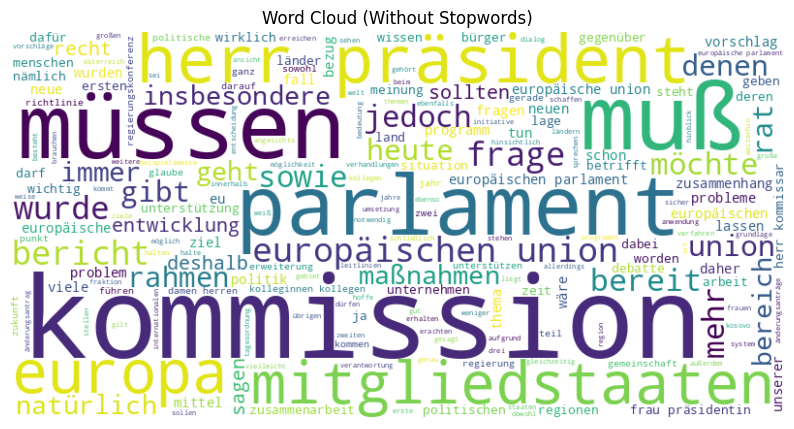

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud (Without Stopwords)")
plt.savefig("wordcloud.png")